In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df = df.drop(['sepal length (cm)', 'sepal width (cm)'],axis = 'columns')
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


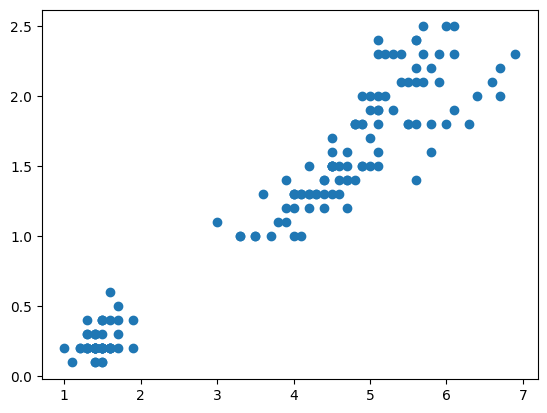

In [6]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [7]:
from sklearn.cluster import KMeans

In [8]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
df['cluster'] = y_pred
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [10]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

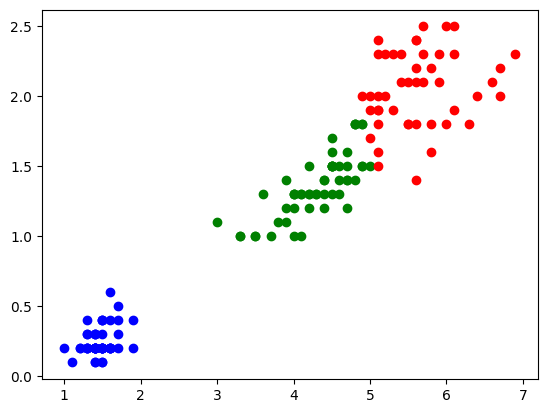

In [11]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'green')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'blue')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'red')

In [12]:
sse =[]

for k in range(1,11):
    k = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

In [13]:
sse

[31.412885668276974,
 31.412885668276974,
 31.412885668276974,
 31.412885668276974,
 31.412885668276974,
 31.412885668276974,
 31.412885668276974,
 31.412885668276974,
 31.412885668276974,
 31.412885668276974]

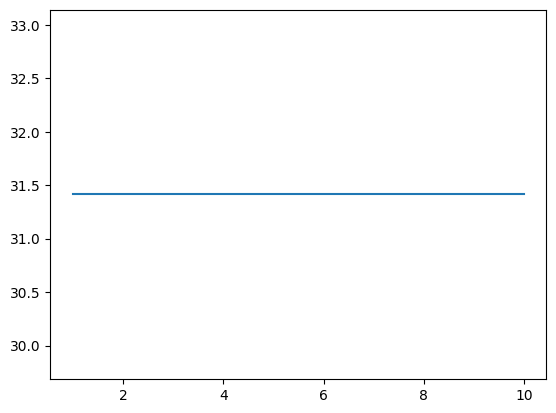

In [14]:
plt.plot(range(1,11),sse)